<a href="https://colab.research.google.com/github/worldterminator/mess/blob/main/Dan's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

# Set the URL of the raw dataset (replace this with the correct raw URL)
df = pd.read_csv('https://github.com/worldterminator/mess/raw/main/mmc2.csv')

# Load the CSV data into a DataFrame

# Display the DataFrame
print(df.head())


                    location year_month public total total_sex_male  \
0  Australia_New South Wales   Jan 2019      Y    75             .a   
1  Australia_New South Wales   Feb 2019      Y    72             .a   
2  Australia_New South Wales   Mar 2019      Y    91             .a   
3  Australia_New South Wales   Apr 2019      Y    56             .a   
4  Australia_New South Wales   May 2019      Y    67             .a   

  total_sex_female total_age_0_19 total_age_20_39 total_age_40_59  \
0               .a             .a              .a              .a   
1               .a             .a              .a              .a   
2               .a             .a              .a              .a   
3               .a             .a              .a              .a   
4               .a             .a              .a              .a   

  total_age_60_max total_sex_male_age_0_19 total_sex_male_age_20_39  \
0               .a                      .a                       .a   
1               

In [24]:
#replication of findings on USA_California:

ca_df = df[df['location'] == 'USA_California'].copy()
ca_df.reset_index(drop=True, inplace=True)
ca_df.head()

,location,year_month,public,total,total_sex_male,total_sex_female,total_age_0_19,total_age_20_39,total_age_40_59,total_age_60_max,total_sex_male_age_0_19,total_sex_male_age_20_39,total_sex_male_age_40_59,total_sex_male_age_60_max,total_sex_female_age_0_19,total_sex_female_age_20_39,total_sex_female_age_40_59,total_sex_female_age_60_max
0,USA_California,Jan 2016,Y,387,292,95,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
1,USA_California,Feb 2016,Y,353,274,79,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
2,USA_California,Mar 2016,Y,373,288,85,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
3,USA_California,Apr 2016,Y,381,285,96,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
4,USA_California,May 2016,Y,366,279,87,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a


In [25]:
if 'year_month' in ca_df.columns:
    print(ca_df['year_month'].head())  # Print the first few entries in the 'year_month' column
else:
    print("Column 'year_month' does not exist in ca_df.")


0    Jan 2016
1    Feb 2016
2    Mar 2016
3    Apr 2016
4    May 2016
Name: year_month, dtype: object


In [26]:
import numpy as np
# Convert 'year_month' to a datetime object
ca_df['year_month'] = pd.to_datetime(ca_df['year_month'], format='%b %Y')

# Set 'year_month' as the index
ca_df.set_index('year_month', inplace=True)

# For segmented regression, you may want to create a binary variable representing the period before and after the breakpoint
ca_df['post_breakpoint'] = (ca_df.index >= '2020-04-01').astype(int)

# You might also want to create a time variable representing the months elapsed since the beginning of the series
ca_df['time'] = np.arange(len(ca_df))

ca_df.head()

,location,public,total,total_sex_male,total_sex_female,total_age_0_19,total_age_20_39,total_age_40_59,total_age_60_max,total_sex_male_age_0_19,total_sex_male_age_20_39,total_sex_male_age_40_59,total_sex_male_age_60_max,total_sex_female_age_0_19,total_sex_female_age_20_39,total_sex_female_age_40_59,total_sex_female_age_60_max,post_breakpoint,time
year_month,,,,,,,,,,,,,,,,,,,
2016-01-01,USA_California,Y,387,292,95,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,0
2016-02-01,USA_California,Y,353,274,79,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,1
2016-03-01,USA_California,Y,373,288,85,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,2
2016-04-01,USA_California,Y,381,285,96,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,3
2016-05-01,USA_California,Y,366,279,87,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,4


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     7.743
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           0.000180
Time:                        17:02:45   Log-Likelihood:                -314.50
No. Observations:                  66   AIC:                             637.0
Df Residuals:                      62   BIC:                             645.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   363.37

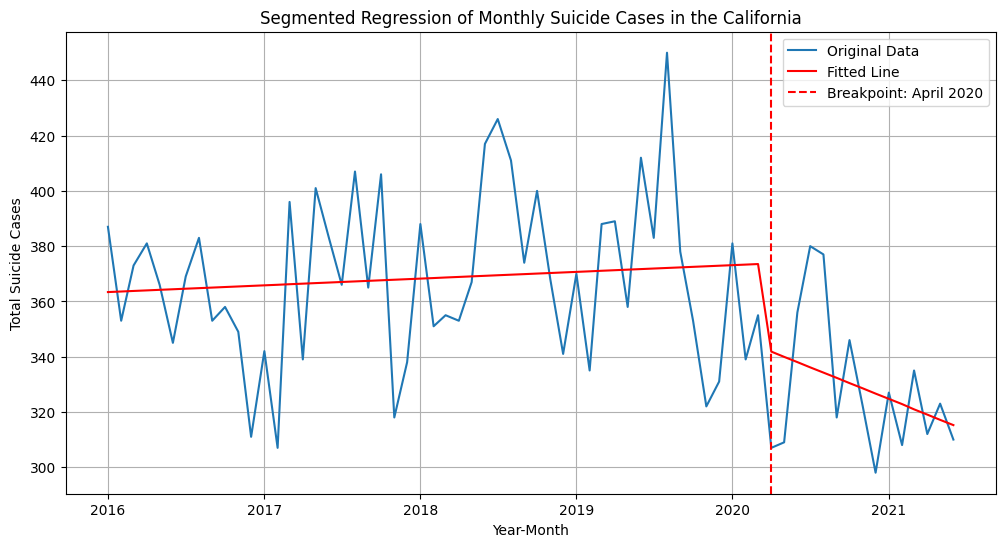

In [27]:
# Create the independent variable for the regression model
import statsmodels.api as sm
import matplotlib.pyplot as plt

ca_df['time_after_breakpoint'] = ca_df['time'] * ca_df['post_breakpoint']
X = ca_df[['time', 'post_breakpoint', 'time_after_breakpoint']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)
# ~columns to numeric, handling errors by converting them to NaN
ca_df['total'] = pd.to_numeric(ca_df['total'], errors='coerce')
ca_df['time'] = pd.to_numeric(ca_df['time'], errors='coerce')
ca_df['post_breakpoint'] = pd.to_numeric(ca_df['post_breakpoint'], errors='coerce')
ca_df['time_after_breakpoint'] = pd.to_numeric(ca_df['time_after_breakpoint'], errors='coerce')
ca_df = ca_df.dropna(subset=['total', 'time', 'post_breakpoint', 'time_after_breakpoint'])
import statsmodels.api as sm
# the dependent variable
y = ca_df['total']

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Predict the values using the model
ca_df['predicted'] = model.predict(X)

# Plot it!!!!!
plt.figure(figsize=(12, 6))
plt.plot(ca_df.index, ca_df['total'], label='Original Data')
plt.plot(ca_df.index, ca_df['predicted'], color='red', label='Fitted Line')
plt.axvline(pd.Timestamp('2020-04-01'), color='r', linestyle='--', label='Breakpoint: April 2020')
plt.title('Segmented Regression of Monthly Suicide Cases in the California')
plt.xlabel('Year-Month')
plt.ylabel('Total Suicide Cases')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-30-ba1f9a8bed56>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['time'] = range(1, len(ca_df) + 1)
<ipython-input-30-ba1f9a8bed56>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['post_breakpoint'] = (ca_df.index > '2020-04-01').astype(int)
<ipython-input-30-ba1f9a8bed56>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1.986
Date:                Mon, 02 Oct 2023   Prob (F-statistic):              0.159
Time:                        17:16:15   Log-Likelihood:                -91.184
No. Observations:                  19   AIC:                             190.4
Df Residuals:                      15   BIC:                             194.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   391.90

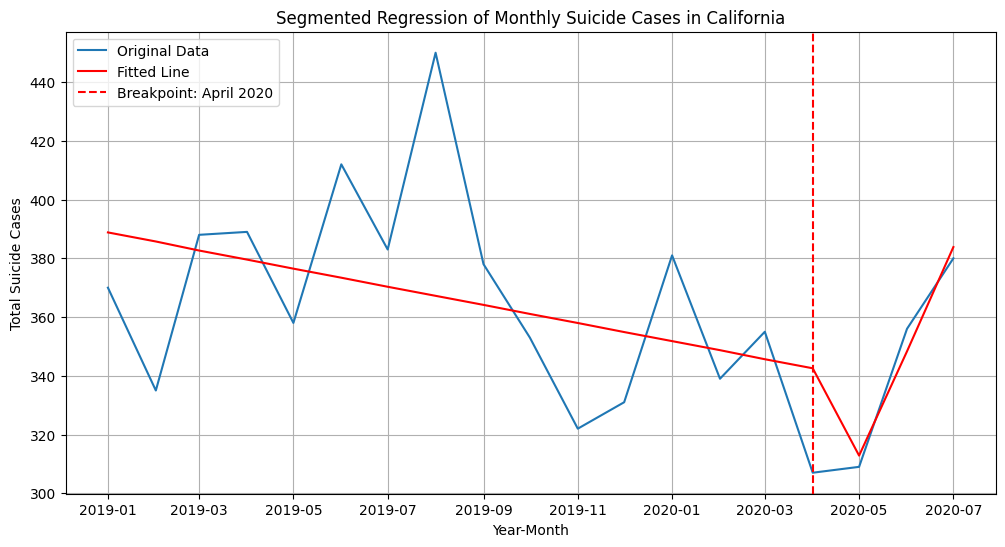

In [30]:
#try removing data after July 31 2020
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Ensure your index is in date format
ca_df.index = pd.to_datetime(ca_df.index)

# Filter the dataframe to remove data
ca_df = ca_df[(ca_df.index >= '2019-01-01') & (ca_df.index <= '2020-07-31')]


# Recompute time, post_breakpoint, and time_after_breakpoint if necessary
# Example: If 'time' is a sequential count of months
ca_df['time'] = range(1, len(ca_df) + 1)
ca_df['post_breakpoint'] = (ca_df.index > '2020-04-01').astype(int)
ca_df['time_after_breakpoint'] = ca_df['time'] * ca_df['post_breakpoint']

# Prepare variables for the regression model
X = ca_df[['time', 'post_breakpoint', 'time_after_breakpoint']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Define the dependent variable
y = ca_df['total']

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Predict the values using the model
ca_df['predicted'] = model.predict(X)

# Plot the data and the fitted line
plt.figure(figsize=(12, 6))
plt.plot(ca_df.index, ca_df['total'], label='Original Data')
plt.plot(ca_df.index, ca_df['predicted'], color='red', label='Fitted Line')
plt.axvline(pd.Timestamp('2020-04-01'), color='r', linestyle='--', label='Breakpoint: April 2020')
plt.title('Segmented Regression of Monthly Suicide Cases in California')
plt.xlabel('Year-Month')
plt.ylabel('Total Suicide Cases')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
pre_breakpoint_data = ca_df[ca_df['post_breakpoint'] == 0]
X_pre = pre_breakpoint_data[['time']]
X_pre = sm.add_constant(X_pre)
y_pre = pre_breakpoint_data['total']

model_pre = sm.OLS(y_pre, X_pre).fit()


In [32]:
post_breakpoint_data = ca_df[ca_df['post_breakpoint'] == 1]
X_post = post_breakpoint_data[['time']]
X_post = sm.add_constant(X_post)

post_breakpoint_data['expected'] = model_pre.predict(X_post)

<ipython-input-32-7fed36c189f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_breakpoint_data['expected'] = model_pre.predict(X_post)


In [33]:
print(post_breakpoint_data['expected'])

year_month
2020-05-01    339.475000
2020-06-01    336.391176
2020-07-01    333.307353
Name: expected, dtype: float64


In [34]:
observed = post_breakpoint_data['total'].sum()
expected = post_breakpoint_data['expected'].sum()

ratio = observed / expected if expected != 0 else np.nan


In [35]:
np.random.seed(0)
n_bootstrap_samples = 1000
bootstrap_ratios = []

for _ in range(n_bootstrap_samples):
    bootstrap_observed = np.random.choice(post_breakpoint_data['total'], size=len(post_breakpoint_data['total']), replace=True).sum()
    bootstrap_expected = np.random.choice(post_breakpoint_data['expected'], size=len(post_breakpoint_data['expected']), replace=True).sum()

    bootstrap_ratios.append(bootstrap_observed / bootstrap_expected)

alpha = 0.05
lower_bound = np.percentile(bootstrap_ratios, alpha/2*100)
upper_bound = np.percentile(bootstrap_ratios, (1-alpha/2)*100)


In [36]:
print(f"Observed: {observed}")
print(f"Expected: {expected}")
print(f"Observed-to-expected ratio: {ratio}")
print(f"{(1-alpha)*100}% Confidence interval for the ratio: ({lower_bound}, {upper_bound})")
#observed 4928 vs expected 5627.2 (0.843, 1.01)

Observed: 1045
Expected: 1009.173529411765
Observed-to-expected ratio: 1.0355008029284298
95.0% Confidence interval for the ratio: (0.9185734395355545, 1.1193755062964867)


In [19]:
# Fit the pre-breakpoint regression model
model_pre = sm.OLS(y_pre, X_pre).fit()

# Filter post-breakpoint data up to July 31, 2020
post_breakpoint_data = post_breakpoint_data[post_breakpoint_data.index <= pd.Timestamp('2020-07-31')]

# Predict the values using the pre-breakpoint model as expected values
X_post = post_breakpoint_data[['time']]
X_post = sm.add_constant(X_post)
post_breakpoint_data['expected'] = model_pre.predict(X_post)

# Calculate the sum of observed values (post-breakpoint)
sum_observed = post_breakpoint_data['total'].sum()

# Calculate the sum of expected values (predicted by the pre-breakpoint model)
sum_expected = post_breakpoint_data['expected'].sum()

# Display the sums
print(f"Sum of Observed Values: {sum_observed}")
print(f"Sum of Expected Values: {sum_expected}")

ratio = sum_observed / sum_expected if expected != 0 else np.nan
#observed 1352 vs expected 1496.1 (by July 31, 2020, this is a replication)
np.random.seed(0)
n_bootstrap_samples = 1000
bootstrap_ratios = []

for _ in range(n_bootstrap_samples):
    bootstrap_observed = np.random.choice(post_breakpoint_data['total'], size=len(post_breakpoint_data['total']), replace=True).sum()
    bootstrap_expected = np.random.choice(post_breakpoint_data['expected'], size=len(post_breakpoint_data['expected']), replace=True).sum()

    bootstrap_ratios.append(bootstrap_observed / bootstrap_expected)

alpha = 0.05
lower_bound = np.percentile(bootstrap_ratios, alpha/2*100)
upper_bound = np.percentile(bootstrap_ratios, (1-alpha/2)*100)
print(f"Observed-to-expected ratio: {ratio}")
print(f"{(1-alpha)*100}% Confidence interval for the ratio: ({lower_bound}, {upper_bound})")

#observed 1352 vs expected 1496.1 (0.82, 0.98) ratio=0.90 (by July 31, 2020, this is a replication)

Sum of Observed Values: 1707
Sum of Expected Values: 1877.7356542617053
Observed-to-expected ratio: 0.9090736473612758
95.0% Confidence interval for the ratio: (0.8447410775083138, 0.9732405268235073)


<ipython-input-19-3cb5c765942e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_breakpoint_data['expected'] = model_pre.predict(X_post)


In [41]:
import numpy as np

# Step 1: Calculate Expected Values
# (Assuming 'model' is the fitted regression model and 'X' is your independent variable matrix)
ca_df['expected'] = model.predict(X)

# Subset DataFrame to only have data post-breakpoint
post_breakpoint_df = ca_df[ca_df['post_breakpoint'] == 1]

# Step 2: Calculate Observed Values (Actual recorded cases)
# Assuming 'total' column has the actual recorded suicide cases
observed_values = post_breakpoint_df['total']

# Expected values from the model
expected_values = post_breakpoint_df['expected']

# Step 3: Calculate Ratio and Log Ratio
# Avoid division by zero by adding a small constant if necessary
ratio = observed_values / (expected_values + 1e-10)  # Adding small constant to avoid division by zero
log_ratio = np.log(ratio + 1e-10)  # Adding small constant to avoid log(0)

# Add ratio and log_ratio to the DataFrame
post_breakpoint_df = post_breakpoint_df.assign(ratio=ratio, log_ratio=log_ratio)

# View the result
print(post_breakpoint_df[['total', 'expected', 'ratio', 'log_ratio']])


            total    expected     ratio  log_ratio
year_month                                        
2020-05-01    309  312.833333  0.987746  -0.012329
2020-06-01    356  348.333333  1.022010   0.021771
2020-07-01    380  383.833333  0.990013  -0.010037


In [43]:
# Subset the DataFrame to keep only rows where 'location' is 'USA'
usa_df = df[df['location'] == 'USA'].copy()

# Resetting index for convenience
usa_df.reset_index(drop=True, inplace=True)

usa_df.head()


,location,year_month,public,total,total_sex_male,total_sex_female,total_age_0_19,total_age_20_39,total_age_40_59,total_age_60_max,total_sex_male_age_0_19,total_sex_male_age_20_39,total_sex_male_age_40_59,total_sex_male_age_60_max,total_sex_female_age_0_19,total_sex_female_age_20_39,total_sex_female_age_40_59,total_sex_female_age_60_max
0,USA,Jan 2016,Y,3720,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
1,USA,Feb 2016,Y,3445,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
2,USA,Mar 2016,Y,3921,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
3,USA,Apr 2016,Y,3812,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a
4,USA,May 2016,Y,3853,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a


In [44]:
import numpy as np

# Convert 'year_month' to a datetime object
usa_df['year_month'] = pd.to_datetime(usa_df['year_month'], format='%b %Y')

# Set 'year_month' as the index
usa_df.set_index('year_month', inplace=True)

# For segmented regression, you may want to create a binary variable representing the period before and after the breakpoint
usa_df['post_breakpoint'] = (usa_df.index >= '2020-04-01').astype(int)

# You might also want to create a time variable representing the months elapsed since the beginning of the series
usa_df['time'] = np.arange(len(usa_df))

usa_df.head()

,location,public,total,total_sex_male,total_sex_female,total_age_0_19,total_age_20_39,total_age_40_59,total_age_60_max,total_sex_male_age_0_19,total_sex_male_age_20_39,total_sex_male_age_40_59,total_sex_male_age_60_max,total_sex_female_age_0_19,total_sex_female_age_20_39,total_sex_female_age_40_59,total_sex_female_age_60_max,post_breakpoint,time
year_month,,,,,,,,,,,,,,,,,,,
2016-01-01,USA,Y,3720,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,0
2016-02-01,USA,Y,3445,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,1
2016-03-01,USA,Y,3921,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,2
2016-04-01,USA,Y,3812,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,3
2016-05-01,USA,Y,3853,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,.a,0,4


In [45]:
print(usa_df.columns)

Index(['location', 'public', 'total', 'total_sex_male', 'total_sex_female',
       'total_age_0_19', 'total_age_20_39', 'total_age_40_59',
       'total_age_60_max', 'total_sex_male_age_0_19',
       'total_sex_male_age_20_39', 'total_sex_male_age_40_59',
       'total_sex_male_age_60_max', 'total_sex_female_age_0_19',
       'total_sex_female_age_20_39', 'total_sex_female_age_40_59',
       'total_sex_female_age_60_max', 'post_breakpoint', 'time'],
      dtype='object')


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.632
Date:                Mon, 02 Oct 2023   Prob (F-statistic):              0.192
Time:                        17:35:16   Log-Likelihood:                -420.69
No. Observations:                  61   AIC:                             849.4
Df Residuals:                      57   BIC:                             857.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3801.03

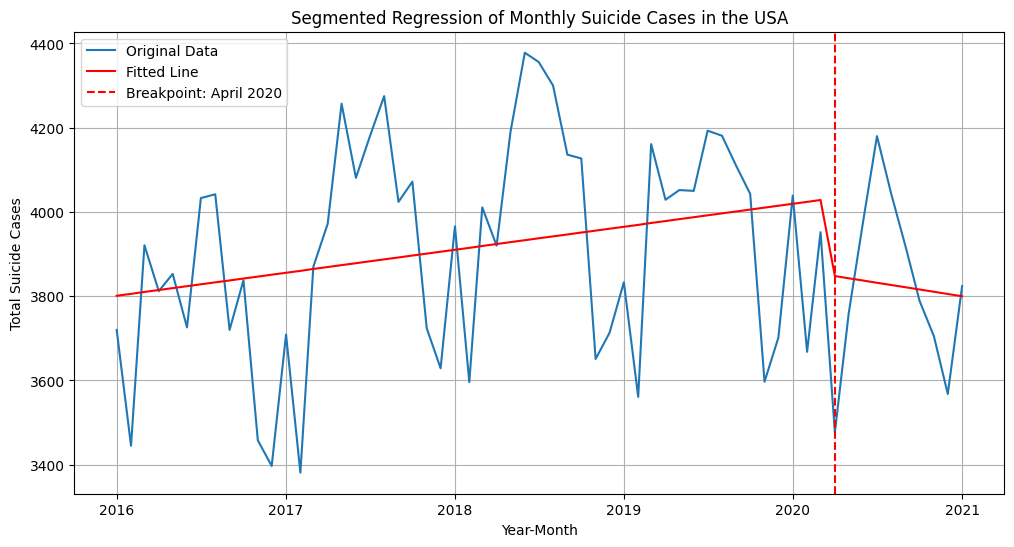

In [46]:
import statsmodels.api as sm

# Create the independent variable for the regression model
usa_df['time_after_breakpoint'] = usa_df['time'] * usa_df['post_breakpoint']
X = usa_df[['time', 'post_breakpoint', 'time_after_breakpoint']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)
# Convert columns to numeric, handling errors by converting them to NaN
usa_df['total'] = pd.to_numeric(usa_df['total'], errors='coerce')
usa_df['time'] = pd.to_numeric(usa_df['time'], errors='coerce')
usa_df['post_breakpoint'] = pd.to_numeric(usa_df['post_breakpoint'], errors='coerce')
usa_df['time_after_breakpoint'] = pd.to_numeric(usa_df['time_after_breakpoint'], errors='coerce')

# Drop rows where any of the above columns have NaN values
usa_df = usa_df.dropna(subset=['total', 'time', 'post_breakpoint', 'time_after_breakpoint'])

# the dependent variable
y = usa_df['total']

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Predict the values using the model
usa_df['predicted'] = model.predict(X)

# Plot it!!!!!
plt.figure(figsize=(12, 6))
plt.plot(usa_df.index, usa_df['total'], label='Original Data')
plt.plot(usa_df.index, usa_df['predicted'], color='red', label='Fitted Line')
plt.axvline(pd.Timestamp('2020-04-01'), color='r', linestyle='--', label='Breakpoint: April 2020')
plt.title('Segmented Regression of Monthly Suicide Cases in the USA')
plt.xlabel('Year-Month')
plt.ylabel('Total Suicide Cases')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-47-a85db7799102>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df['time_after_breakpoint'] = usa_df['time'] * usa_df['post_breakpoint']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     2.426
Date:                Mon, 02 Oct 2023   Prob (F-statistic):              0.106
Time:                        17:35:19   Log-Likelihood:                -126.06
No. Observations:                  19   AIC:                             260.1
Df Residuals:                      15   BIC:                             263.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4237.37

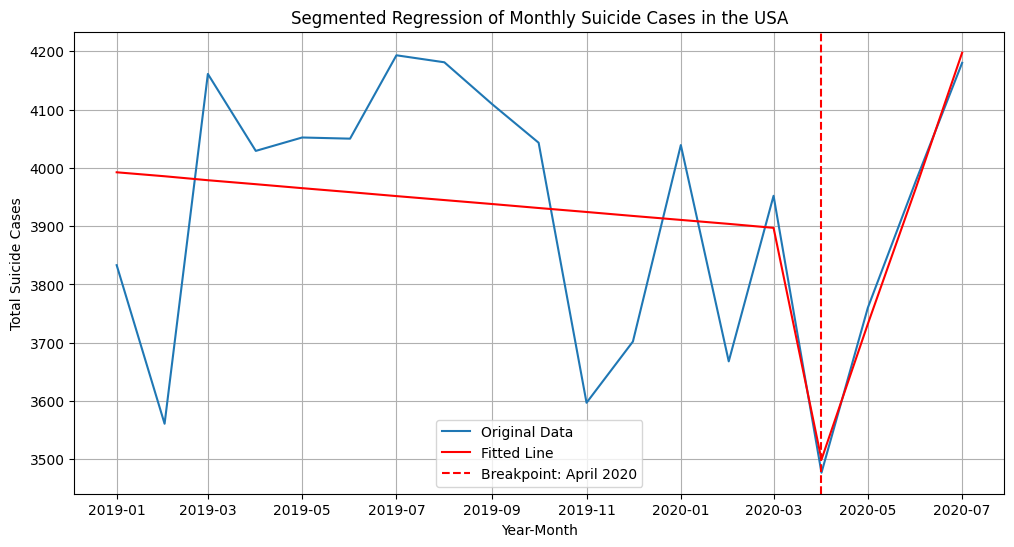

In [47]:
#and here what if we remove data after july 2020...
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Convert columns to numeric, handling errors by converting them to NaN


# Filter the DataFrame to keep data from January 2019 to July 2020
usa_df = usa_df[(usa_df.index >= '2019-01-01') & (usa_df.index <= '2020-07-31')]

# Recalculate 'time_after_breakpoint' after filtering
usa_df['time_after_breakpoint'] = usa_df['time'] * usa_df['post_breakpoint']

# Drop rows where any of the above columns have NaN values
usa_df = usa_df.dropna(subset=['total', 'time', 'post_breakpoint', 'time_after_breakpoint'])

# Prepare variables for the regression model
X = usa_df[['time', 'post_breakpoint', 'time_after_breakpoint']]
X = sm.add_constant(X)  # Add a constant to the model (i.e., the intercept)

# Define the dependent variable
y = usa_df['total']

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Predict the values using the model
usa_df['predicted'] = model.predict(X)

# Plot the data and the fitted line
plt.figure(figsize=(12, 6))
plt.plot(usa_df.index, usa_df['total'], label='Original Data')
plt.plot(usa_df.index, usa_df['predicted'], color='red', label='Fitted Line')
plt.axvline(pd.Timestamp('2020-04-01'), color='r', linestyle='--', label='Breakpoint: April 2020')
plt.title('Segmented Regression of Monthly Suicide Cases in the USA')
plt.xlabel('Year-Month')
plt.ylabel('Total Suicide Cases')
plt.legend()
plt.grid(True)
plt.show()


In [48]:
pre_breakpoint_data_usa = usa_df[usa_df['post_breakpoint'] == 0]
X_pre = pre_breakpoint_data_usa[['time']]
X_pre = sm.add_constant(X_pre)
y_pre = pre_breakpoint_data_usa['total']

model_pre = sm.OLS(y_pre, X_pre).fit()
post_breakpoint_data_usa = usa_df[usa_df['post_breakpoint'] == 1]
X_post = post_breakpoint_data_usa[['time']]
X_post = sm.add_constant(X_post)

post_breakpoint_data_usa['expected'] = model_pre.predict(X_post)
observed = post_breakpoint_data_usa['total'].sum()
expected = post_breakpoint_data_usa['expected'].sum()

ratio = observed / expected if expected != 0 else np.nan
np.random.seed(0)
n_bootstrap_samples = 1000
bootstrap_ratios = []

for _ in range(n_bootstrap_samples):
    bootstrap_observed = np.random.choice(post_breakpoint_data_usa['total'], size=len(post_breakpoint_data_usa['total']), replace=True).sum()
    bootstrap_expected = np.random.choice(post_breakpoint_data_usa['expected'], size=len(post_breakpoint_data_usa['expected']), replace=True).sum()

    bootstrap_ratios.append(bootstrap_observed / bootstrap_expected)

alpha = 0.05
lower_bound = np.percentile(bootstrap_ratios, alpha/2*100)
upper_bound = np.percentile(bootstrap_ratios, (1-alpha/2)*100)
print(f"Observed: {observed}")
print(f"Expected: {expected}")
print(f"Observed-to-expected ratio: {ratio}")
print(f"{(1-alpha)*100}% Confidence interval for the ratio: ({lower_bound}, {upper_bound})")
#for USA totals, observed 38239 vs expected 40534.7 ratio=0.94 (0.912,0.973)


Observed: 15394
Expected: 15519.995238095253
Observed-to-expected ratio: 0.9918817476318559
95.0% Confidence interval for the ratio: (0.9155735618536968, 1.051621873830863)


<ipython-input-48-8b90f10d5281>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_breakpoint_data_usa['expected'] = model_pre.predict(X_post)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

best_r2 = 0
best_breakpoint = None

# Iterate over all possible breakpoints
for breakpoint in usa_df.index:
    # Create post-breakpoint and time_after_breakpoint variables
    usa_df['post_breakpoint'] = (usa_df.index >= breakpoint).astype(int)
    usa_df['time_after_breakpoint'] = usa_df['time'] * usa_df['post_breakpoint']

    # Set up and fit the model
    X = sm.add_constant(usa_df[['time', 'post_breakpoint', 'time_after_breakpoint']])
    model = sm.OLS(usa_df['total'], X).fit()

    # Check if this model's R-squared is the best so far
    if model.rsquared > best_r2:
        best_r2 = model.rsquared
        best_breakpoint = breakpoint

# Output the best breakpoint found
print(f"Best breakpoint is at {best_breakpoint}, with an R-squared of {best_r2:.3f}")


Best breakpoint is at 2017-03-01 00:00:00, with an R-squared of 0.246


In [ ]:
print(usa_df[['total']])

            total
year_month       
2016-01-01   3720
2016-02-01   3445
2016-03-01   3921
2016-04-01   3812
2016-05-01   3853
...           ...
2020-09-01   3917
2020-10-01   3789
2020-11-01   3705
2020-12-01   3568
2021-01-01   3824

[61 rows x 1 columns]


In [ ]:
usa_df = usa_df.sort_index()


In [ ]:
print(usa_df.loc['2019':'2020'])


           location public  total total_sex_male total_sex_female  \
year_month                                                          
2019-01-01      USA      Y   3833             .a               .a   
2019-02-01      USA      Y   3561             .a               .a   
2019-03-01      USA      Y   4161             .a               .a   
2019-04-01      USA      Y   4029             .a               .a   
2019-05-01      USA      Y   4052             .a               .a   
2019-06-01      USA      Y   4050             .a               .a   
2019-07-01      USA      Y   4193             .a               .a   
2019-08-01      USA      Y   4181             .a               .a   
2019-09-01      USA      Y   4109             .a               .a   
2019-10-01      USA      Y   4043             .a               .a   
2019-11-01      USA      Y   3597             .a               .a   
2019-12-01      USA      Y   3702             .a               .a   
2020-01-01      USA      Y   4039 